In [10]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
data = pd.read_csv("temp.csv")

# Handle missing values (e.g., filling with mean/median)
data = data.fillna(...)

# Identify categorical features (assuming none for this example)
categorical_features = []  # Add names of categorical features if any

# Encode categorical features (if any)
if len(categorical_features) > 0:
  encoder = LabelEncoder()
  for feature in categorical_features:
    data[feature] = encoder.fit_transform(data[feature])

# Feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [11]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from shap import Explainer

# Split data into features (X) and target variable (y)
X = data_scaled
y = data["Class"]

# Train the model
model = RandomForestClassifier()
model.fit(X, y)

# Create SHAP explainer
explainer = Explainer(model, X)

# Generate SHAP values for explanations
shap_values = explainer(X)

In [12]:
# Save the trained model (using pickle for example)
import pickle

with open("fraud_detection_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save SHAP explainer for later use (consider custom solution)
# ... (implementation depends on your chosen deployment framework)

In [13]:
import pickle
import shap

# ... your existing training code for model creation, training, etc.

# Create SHAP explainer object
explainer = shap.Explainer(model.predict, X)

# Save the explainer object
with open("shap_explainer.pkl", "wb") as f:
  pickle.dump(explainer, f)

# ... your remaining training code


c:\Users\979ar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\979ar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\979ar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

Validation Set Performance:
Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000


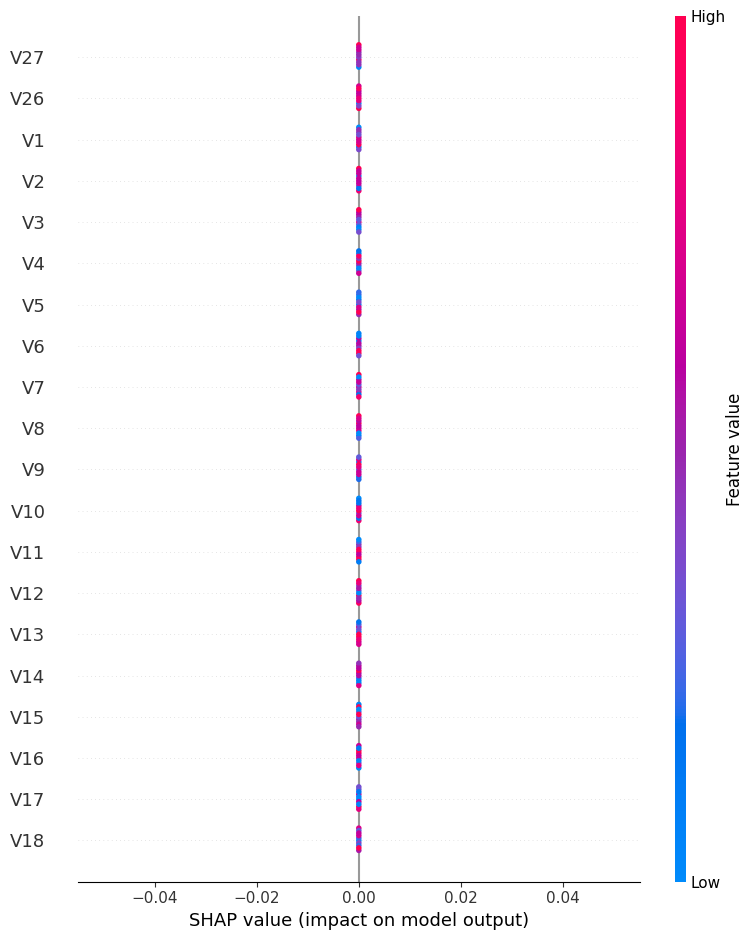


Test Set Performance:
Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000


c:\Users\979ar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\979ar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\979ar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import shap

# Load data
data = pd.read_csv("test.csv")

# Handle missing values (replace with appropriate strategy)
data = data.fillna(...)  # Implement your preferred method (e.g., mean/median imputation)

# Identify categorical features (if any)
categorical_features = []  # Add names of categorical features if present
if len(categorical_features) > 0:
  # Encode categorical features (if any)
  from sklearn.preprocessing import LabelEncoder
  encoder = LabelEncoder()
  for feature in categorical_features:
    data[feature] = encoder.fit_transform(data[feature])

# Feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[["V1", "V2","V3", "V4","V5", "V6","V7", "V8","V9", "V10", "V11", "V12","V13", "V14","V15", "V16","V17", "V18","V19", "V20", "V21", "V22","V23", "V24","V25", "V26","V27", "V28"]])

# Separate features and target variable
X = data_scaled
y = data["Class"]

# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model (Random Forest) with SHAP integration
model = RandomForestClassifier()
explainer = shap.Explainer(model.predict, X_train)
model.fit(X_train, y_train)

# Evaluate model performance on validation set
y_pred_val = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)
print("Validation Set Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate SHAP explanations for test set
shap_values = explainer(X_test)

# Analyze SHAP explanations (example using summary plot)
shap.summary_plot(shap_values, X_test, feature_names=data.columns[:-1])  # Exclude target variable

# Evaluate model performance on test set (optional)
y_pred_test = model.predict(X_test)
print("\nTest Set Performance:")  # Add newline for better formatting
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_test):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_test):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_test):.4f}")

# Save the model (optional)
import pickle
with open("fraud_detection_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Saving SHAP explainer for later use (replace with custom solution for deployment)
# ... (implementation depends on your chosen deployment framework)
